In [1]:
import sys
import numpy             as     np
import pylab             as     pl
import astropy.io.fits   as     fits
import matplotlib        as     mpl
import matplotlib.pyplot as     plt

from   astropy.table     import Table
from   matplotlib.pyplot import figure

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/lumfn/')
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/')

In [3]:
from   SV3.define_sample import define_sample
from   params            import params

In [4]:
version   = 0.3

In [5]:
reachable = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/bright_reachable_sv3_v{:.1f}.fits'.format(version))
reachable

RA,DEC,REF_EPOCH,PARALLAX,PMRA,PMDEC,TARGETID,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,NUMOBS_MORE,NUMOBS,ZWARN_MTL,ZTILEID,TARGET_STATE,TIMESTAMP,VERSION,LOCATION,TILEID,TILELOCID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,FIBER,FIBERSTATUS,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,DELTA_X,DELTA_Y,EXPTIME,PSF_TO_FIBER_SPECFLUX,NIGHT,EXPID,MJD,INTEG_COADD_FLUX_B,MEDIAN_COADD_FLUX_B,MEDIAN_COADD_SNR_B,INTEG_COADD_FLUX_R,MEDIAN_COADD_FLUX_R,MEDIAN_COADD_SNR_R,INTEG_COADD_FLUX_Z,MEDIAN_COADD_FLUX_Z,MEDIAN_COADD_SNR_Z,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,FIBERFLUX_R,FLUX_G,FLUX_R,MW_TRANSMISSION_G,MW_TRANSMISSION_R,PHOTSYS,REF_CAT,GMAG,GMAG_DRED,RMAG,RMAG_DRED,FIBER_RMAG,FIBER_RMAG_DRED,GMR,GMR_DRED,BGS_A_SUCCESS
float64,float64,float32,float32,float32,float32,int64,float64,int32,int64,int64,int64,int64,int64,int32,bytes30,bytes25,bytes14,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,int32,bytes3,float32,float32,int32,float64,float64,float64,float64,int32,int32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,float32,float32,float32,float32,float32,bytes1,bytes2,float32,float32,float32,float32,float32,float32,float32,float32,bool
212.07059399316668,-2.1573886448277855,0.0,0.0,0.0,0.0,39627733927462321,0.7011759117301452,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1462,526,5261462,1e+20,1e+20 .. 1e+20,1e+20,1e+20,999999,999999,N/A,N/A,999999,1e+20,999999,999999,N/A,1e+20,1e+20,999999,1e+20,1e+20,1e+20,1e+20,999999,999999,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1152921504606846976,131074,0,5.6034546,5.420514,14.23843,0.83962685,0.88892144,S,,20.664898,20.475115,19.616344,19.488503,20.62886,20.501019,1.0485535,0.9866123,False
212.07059399316668,-2.1573886448277855,0.0,0.0,0.0,0.0,39627733927462321,0.7011759117301452,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1463,532,5321463,1e+20,1e+20 .. 1e+20,1e+20,1e+20,999999,999999,N/A,N/A,999999,1e+20,999999,999999,N/A,1e+20,1e+20,999999,1e+20,1e+20,1e+20,1e+20,999999,999999,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1152921504606846976,131074,0,5.6034546,5.420514,14.23843,0.83962685,0.88892144,S,,20.664898,20.475115,19.616344,19.488503,20.62886,20.501019,1.0485535,0.9866123,False
212.07182231138097,-2.1576366940231786,0.0,0.0,0.0,0.0,39627733927462346,0.7155266907459459,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1463,532,5321463,8691.917048618197,110.1924173269175 .. -13.909760857702603,0.20831738790192758,3.870861964601318e-05,0,7886,GALAXY,,10,300.0186497028917,523,0,TGT,175.50546,-366.08752,102100,-0.004,0.001,329.2138,0.7514636097863017,20210512,88162,59347.28192359,2494.5547,1.495369,1.2990925,4100.856,2.2913628,3.9154603,4768.7817,2.1793647,4.723067,0.013547539,7.073917,109.063484,0.39787793,0.16146766,5.505917,0.007272676,489.47827,0.8947302,7.7659473,18.000463,0.0,1035.9039,4.453982,9.583865,23.519928,7.0811896,1634.4458,5.74659,17.51128,1152921504606846976,131074,0,6.5144067,5.435668,15.029476,0.8395581,0.88887244,S,,20.661867,20.471994,19.55764,19.429739,20.465313,20.337412,1.1042271,1.0422554,True
212.07182231138097,-2.1576366940231786,0.0,0.0,0.0,0.0,39627733927462346,0.7155266907459459,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04

In [6]:
stats, cnts = np.unique(reachable['FIBERSTATUS'].data, return_counts=True)

for s, c in zip(stats, cnts):
    print('{}\t{}'.format(s, c))

0	241429
8	3082
512	10736
520	3253
65536	718
65544	15
66048	36
66056	7
999999	1108673
4194304	530
4194816	2


In [7]:
np.count_nonzero(~np.isin(reachable['FIBERSTATUS'].data, [0,999999]))

18379

In [8]:
bright = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/bright_sv3_v{:.1f}.fits'.format(version))
bright

RA,DEC,REF_EPOCH,PARALLAX,PMRA,PMDEC,TARGETID,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,NUMOBS_MORE,NUMOBS,ZWARN_MTL,ZTILEID,TARGET_STATE,TIMESTAMP,VERSION,LOCATION,TILEID,TILELOCID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,FIBER,FIBERSTATUS,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,DELTA_X,DELTA_Y,EXPTIME,PSF_TO_FIBER_SPECFLUX,NIGHT,EXPID,MJD,INTEG_COADD_FLUX_B,MEDIAN_COADD_FLUX_B,MEDIAN_COADD_SNR_B,INTEG_COADD_FLUX_R,MEDIAN_COADD_FLUX_R,MEDIAN_COADD_SNR_R,INTEG_COADD_FLUX_Z,MEDIAN_COADD_FLUX_Z,MEDIAN_COADD_SNR_Z,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,FIBERFLUX_R,FLUX_G,FLUX_R,MW_TRANSMISSION_G,MW_TRANSMISSION_R,PHOTSYS,REF_CAT,GMAG,GMAG_DRED,RMAG,RMAG_DRED,FIBER_RMAG,FIBER_RMAG_DRED,GMR,GMR_DRED,BGS_A_SUCCESS,BGS_A_WEIGHT,BGS_Z_SUCCESS,BGS_Z_WEIGHT
float64,float64,float32,float32,float32,float32,int64,float64,int32,int64,int64,int64,int64,int64,int32,bytes30,bytes25,bytes14,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,int32,bytes3,float32,float32,int32,float64,float64,float64,float64,int32,int32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,float32,float32,float32,float32,float32,bytes1,bytes2,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,bool,float32
212.07182231138097,-2.1576366940231786,0.0,0.0,0.0,0.0,39627733927462346,0.7155266907459459,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1463,532,5321463,8691.917048618197,110.1924173269175 .. -13.909760857702603,0.20831738790192758,3.870861964601318e-05,0,7886,GALAXY,,10,300.0186497028917,523,0,TGT,175.50546,-366.08752,102100,-0.004,0.001,329.2138,0.7514636097863017,20210512,88162,59347.28192359,2494.5547,1.495369,1.2990925,4100.856,2.2913628,3.9154603,4768.7817,2.1793647,4.723067,0.013547539,7.073917,109.063484,0.39787793,0.16146766,5.505917,0.007272676,489.47827,0.8947302,7.7659473,18.000463,0.0,1035.9039,4.453982,9.583865,23.519928,7.0811896,1634.4458,5.74659,17.51128,1152921504606846976,131074,0,6.5144067,5.435668,15.029476,0.8395581,0.88887244,S,,20.661867,20.471994,19.55764,19.429739,20.465313,20.337412,1.1042271,1.0422554,True,1.0504202,True,1.0120848
212.13195284744052,-2.1397232701515705,0.0,0.0,0.0,0.0,39627733927463584,0.3064671342899772,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1442,532,5321442,8181.238723360002,650.8494234496903 .. 26.321080977338845,0.18489118881349448,8.151114524677556e-05,0,7898,GALAXY,,10,121.69535649672616,515,0,TGT,159.9167,-360.7208,102100,-0.003,-0.0,329.2138,0.7250493309558984,20210512,88162,59347.28192359,2839.2163,1.7219174,1.4668155,4295.8286,2.4269316,4.082689,5179.0156,2.3733006,4.9972258,0.013628212,7.094321,109.622696,0.40032744,0.16285975,5.484065,0.007271832,486.65622,0.8906726,7.714434,17.933203,0.0,1025.0463,4.4246182,9.502515,23.430895,7.1015925,1621.3252,5.7156186,17.379808,1152921504606846976,131074,0,6.960086,14.839426,41.38945,0.83804214,0.8877909,S,,19.571457,19.379622,18.457775,18.328552,20.393463,20.26424,1.1136818,1.0510693,True,1.0504202,True,1.0099682
212.14293772910978,-2.127708100431868,0.0,0.0,0.0,0.0,39627733927463809,0.9682231030567523,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1464,529,5291464,8649.267828658223,482.3641546970651 .. 28.304609010743402,0.18572600120311122,5.0569333051126286e-05,0,7825,GALAXY,,10,491.2810438387096,524,0,TGT,174.46136,-357.95212,102100,0.007,-0.013,836.0849,0.7045758604118871,20210507,87604,59342.33186133,5241.1284,3.161646,2.7221062,9271.688,5.1619253,7.320931,11833.8,

In [9]:
np.unique(bright['NUMOBS'].data, return_counts=True)

(array([0, 1, 2, 3]), array([154424,   2487,   1396,      4]))

In [10]:
for nobs in [0,1,2,3]: 
    print(nobs, np.unique(bright[bright['NUMOBS'].data == nobs]['TARGET_STATE'].data, return_counts=True))

0 (array([b'BGS|UNOBS'], dtype='|S30'), array([154424]))
1 (array([b'BGS|MORE_ZGOOD', b'BGS|MORE_ZWARN'], dtype='|S30'), array([ 149, 2338]))
2 (array([b'BGS|MORE_ZGOOD', b'BGS|MORE_ZWARN'], dtype='|S30'), array([   4, 1392]))
3 (array([b'BGS|DONE'], dtype='|S30'), array([4]))


In [11]:
utids, cnts = np.unique(bright['TARGETID'], return_counts=True)

In [12]:
np.count_nonzero(cnts==cnts.max())

2

In [13]:
utids.data[cnts==cnts.max()]

array([39633318995558810, 39633342940840142])

In [14]:
one_id = bright[bright['TARGETID'] == 39633318995558810]
one_id.sort('MJD')
one_id['PRIORITY'].data

array([102100,  92100,  82100,  82100], dtype=int32)

Text(0.5, 0, '$r$')

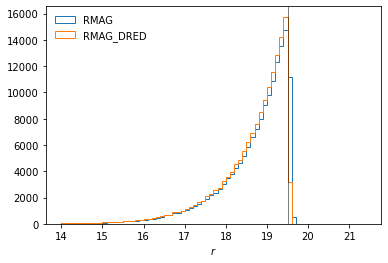

In [15]:
_ = pl.hist(bright['RMAG'], bins=np.arange(14., 21.5, 0.1), histtype='step', label='RMAG')
_ = pl.hist(bright['RMAG_DRED'], bins=np.arange(14., 21.5, 0.1), histtype='step', label='RMAG_DRED')

pl.legend(frameon=False, loc=2)
pl.axvline(19.5, lw=0.5, c='k')
pl.xlabel('$r$')

Text(0.5, 0, 'fiber $r$')

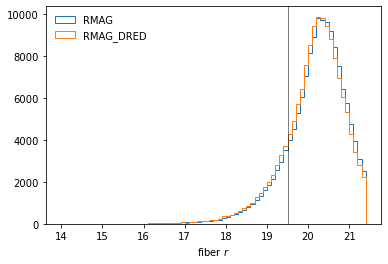

In [16]:
_ = pl.hist(bright['FIBER_RMAG'], bins=np.arange(14., 21.5, 0.1), histtype='step', label='RMAG')
_ = pl.hist(bright['FIBER_RMAG_DRED'], bins=np.arange(14., 21.5, 0.1), histtype='step', label='RMAG_DRED')

pl.legend(frameon=False, loc=2)

pl.axvline(19.5, lw=0.5, c='k')
pl.xlabel('fiber $r$')

In [17]:
# np.unique(bright['ZTILEID'])

In [18]:
derived = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/bright_sv3_derived_v{:.1f}.fits'.format(version))
derived

TARGETID,ROSETTE,BGS_Z_SUCCESS,INSAMPLE,BGS_Z_WEIGHT,BGS_A_WEIGHT,VOLUME,MRH,REF_GMR0P1,REF_GMR0P0,ZMAX,IVMAX,VONVMAX
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
39627733927462346,-1.0,1.0,1.0,1.0120848417282104,1.0504201650619507,6557842.901928521,-19.916587874245813,0.7856902434795595,0.7195012659190705,0.2143594626878119,1.3841174716729834e-07,0.9076824937045924
39627733927463584,-1.0,1.0,1.0,1.0099681615829468,1.0504201650619507,4388413.1469421005,-20.738766389614653,0.8390089675629283,0.7640864042155214,0.2941644387905505,4.662134019296747e-08,0.20459370223087864
39627733927463809,-1.0,1.0,1.0,1.0021929740905762,1.0504201650619507,4455176.687953372,-21.078121125651027,0.8988151303317244,0.8130684548647261,0.330231769511073,3.1087072420182375e-08,0.1384984003431147
39627733927464616,-1.0,1.0,1.0,1.0001806020736694,1.0504201650619507,84719.66841474558,-19.689694313761,1.0325692740796637,0.8785213630569358,0.19263752841677584,1.9854703816758006e-07,0.016820839238287217
39627733927464793,-1.0,1.0,1.0,1.0094077587127686,1.0504201650619507,15168192.405866759,-20.78261008302364,0.899293817950499,0.8218316345956519,0.29588250478293676,4.5684154110034526e-08,0.6929460394402723
39627733927464814,-1.0,1.0,0.0,1.051695466041565,1.0504201650619507,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
39627733927465411,-1.0,1.0,1.0,1.0092251300811768,1.0504201650619507,13263605.968152622,-20.75817917589253,0.9334649528314611,0.8484168999264025,0.2919526463434159,4.786385749236657e-08,0.6348473458945598
39627733927465840,-1.0,1.0,1.0,1.0278266668319702,1.0504201650619507,26279255.262881078,-20.98049291878994,0.7231080168748883,0.6748943137875617,0.3295045747933823,3.132935876129051e-08,0.8233122161103331
39627733931658393,-1.0,1.0,1.0,1.002821922302246,1.0504201650619507,1326557.0487486974,-20.228460950007847,0.5482849485932211,0.5161276491652784,0.2998197426243902,4.362442635531498e-08,0.05787029027926153


In [19]:
# Patch: corrected by v0.4
tids         = []

for ii, row in enumerate(bright):
    tid      = row['TARGETID']
    tids.append(tid)
    
derived['TARGETID'] = np.array(tids, dtype=np.int64)

In [20]:
exclude = np.array([x == b'BGS|MORE_ZWARN' for x in bright['TARGET_STATE'].data])
exclude = bright['TARGETID'].data[exclude]
exclude = np.isin(derived['TARGETID'].data, exclude)

derived['INSAMPLE'].data[exclude] = 0.0

In [21]:
derived['INSAMPLE'].data[bright['RMAG_DRED'] > 19.5] = 0.0

In [22]:
isin                   = derived['INSAMPLE'].astype(bool)

bright                 = bright[isin]
derived                = derived[isin]

In [23]:
np.mean(isin)

0.9200876755247582

In [24]:
len(derived), len(bright)

(145660, 145660)

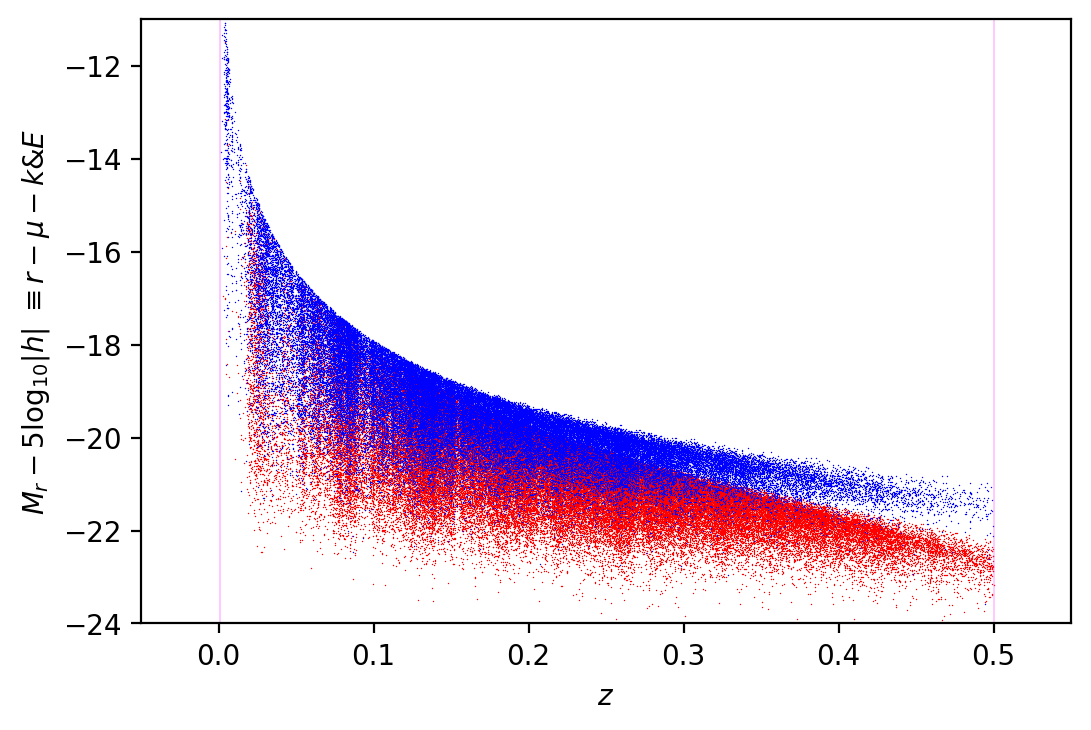

In [25]:
figure(figsize=(6, 4), dpi=200)

red  = (derived['REF_GMR0P0'].data >= params['rf_gmr_redblue'])
blue = (derived['REF_GMR0P0'].data  < params['rf_gmr_redblue'])

pl.scatter(bright['Z'][red],   derived['MRH'][red],  marker='.', lw=0.0,  c='r', label='BGS OP', s=1)
pl.scatter(bright['Z'][blue],  derived['MRH'][blue], marker='.', lw=0.0,  c='b', label='BGS OP', s=1)

# pl.plot(derived['ZMAX'], derived['MRH'], marker=',', lw=0.0,  c='magenta', label='zmax loci', alpha=0.2) 

pl.xlabel('$z$')
pl.ylabel('$M_r - 5\log_{10}|h|$ $\equiv r - \mu -k&E$ ')

pl.xlim(-0.05, 0.55)
pl.ylim( -24., -11.)

# pl.legend(frameon=False, loc=1)
# pl.colorbar(label='TMR ref. $(g-r) - {:.2f}$'.format(params['rf_gmr_redblue']))

pl.axvline(0.001, c='magenta', lw=0.15)
pl.axvline(0.500, c='magenta', lw=0.15)

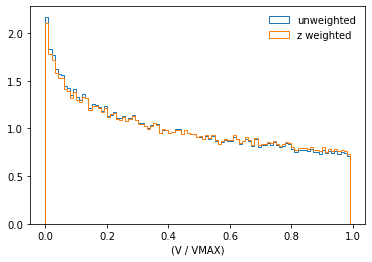

In [26]:
pl.hist(derived['VONVMAX'], bins=np.arange(0.0, 1.0, 0.01), histtype='step', label='unweighted', density=True)
pl.hist(derived['VONVMAX'], weights=derived['BGS_Z_WEIGHT'], bins=np.arange(0.0, 1.0, 0.01), histtype='step', label='z weighted', density=True)

pl.xlabel('(V / VMAX)')

pl.legend(frameon=False, loc=1)

# Done